# Ecuación de Legendre

## Introducción

Dada la ecuación de Sturm–Liouville 
 \begin{align}
{d\over dx}\left[p(x){d\over dx}y(x)\right]-q(x)y(x)+\lambda r(x)y(x)=0
\end{align}

Con las condiciones de frontera:

 \begin{align}
\alpha_1 y(a)+\alpha_2 y'(a)=0\\ 
\beta_1y(b)+\beta_2 y'(b)=0 
\end{align}

donde $a<x<b$ 

Podemos obtener la **ecuación de diferencial de Legendre**: 
\begin{align}
\\ \frac{d}{dx}\left[1-x^2\frac{dy}{dx}\right]+n(n+1)y=0
\end{align}

donde:

\begin{align}
p(x)&=1-x^2&
 q(x)&=0\\
r(x)&=1&
\lambda&=n(n+1)
\end{align}

con
$-1\leq x \leq1$ 

A continuación escribiremos la ecuación en su forma más usual. 

Como $y'=\frac{dy}{dx}$
\begin{align}
\\ \frac{d}{dx}\left[1-x^2y'\right]+n(n+1)y=0
\end{align}

Usando a la fórmula del producto de derivadas en el término $\frac{d}{dx}\left[1-x^2y'\right]$:

\begin{align}
\\f'=u'v+v'u
\end{align}

\begin{align}
u&=1-x^2&
v&=y'\\
u'&=-2x&
v'&=y''
\end{align}

entonces

\begin{align}
\\\frac{d}{dx}\left[xy'\right]=-2xy'+y''(1-x^2)= (1-x^2)y''-2xy'
\end{align}

Sustituyendo en la ecuación obtenemos:

\begin{align}
\\ (1-x^2)y''-2xy'+n(n+1)y=0
\end{align}

## Soluciones

# Relación de recurrencia

Los polinomios de Legendre pueden construirse usando la relación de recurrencia:

Donde los primeros dos términos son: 
\begin{align}
\\ P_{0} = 1
\\ P_{1} = x
\end{align}

\begin{align}
\\ (n+1) P_{n+1} = (2n+1) x P_n - n P_{n-1}
\end{align}

Entonces

\begin{align}
\\ P_{n+1} = \frac{1}{(n+1)}\left[(2n+1) x P_n - n P_{n-1}\right]
\end{align}


Para calcular $P_{n}$ debemos modificar la expresión anterior de la siguiente forma: 

\begin{align}
\\ P_{n} = \frac{1}{n}\left[(2(n-1)+1) x P_{n-1} - (n-1) P_{n-2}\right]
\end{align}

Por ejemplo, si queremos calcular $P_{2}$:

\begin{align}
\\ P_{2}& = \frac{1}{2}\left[(2(2-1)+1) x P_{2-1} - (2-1) P_{2-2}\right]&\\
 P_{2}& = \frac{1}{2}\left[(2(1)+1) x P_{1} - (1) P_{0}\right]&\\
 P_{2}& = \frac{1}{2}\left[3 x P_{1} - P_{0}\right]&
\end{align}

Donde $P_{0}$ y $P_{1}$ son términos conocidos y $x$ es el punto de evaluación del polinomio.

En Julia, teniendo un vector $v=[9,8,7,6,5]$, el término $v[0]$ no está definido, pues la numeración de los elementos del vector inicia en $1$. De este modo, Julia tendrá definido $v[1]=9$

Con base en lo anterior, si contruimos un vector $p$ tal que $p=[P_{0},P_{1},P_{2},...,P_{n}]$ tendremos:

\begin{align}
\\ p[1] = P_{0}
\\ p[2]= P_{1}
\end{align}

y en general

\begin{align}
\\ p[n] = P_{n-1}
\end{align}

Por lo tanto, debemos modificar la relación de recurrencia para obtener $P_{n-1}$

\begin{align}
\\ P_{n-1} = \frac{1}{(n-1)}\left[(2(n-2)+1) x P_{n-2} - (n-2) P_{n-3}\right]
\end{align}


En términos del vector $p$:

\begin{align}
\\ p[n] = \frac{1}{(n-1)}\left[(2(n-2)+1) x p[n-1] - (n-2) p[n-2]\right]
\end{align}

la cual, es la fórmula que utilizaremos en el programa.

Si queremos calcular $P_{2}$, esto es:
\begin{align}
\\ p[3] = P_{2}
\end{align}

de donde vemos que $n=3$

Aplicando la relación de recurrencia: 

\begin{align}
\\ P_{3-1} &= \frac{1}{(3-1)}\left[(2(3-2)+1) x P_{3-2} - (3-2) P_{3-3}\right]&
\\ P_{2} &= \frac{1}{2}\left[(2(1)+1) x P_{1} - (1) P_{0}\right]&
\\ P_{2} &= \frac{1}{2}\left[3 x P_{1} - P_{0}\right]&
\end{align}

Por otro lado, en términos del vector $p$:

\begin{align}
\\ p[3] &= \frac{1}{2}\left[(2(1)+1) x p[2] - (1) p[1]\right]&
\\ p[3] &= \frac{1}{2}\left[3 x p[2] - p[1]\right]&
\end{align}

Como

\begin{align}
\\ p[1] = P_{0} =1
\\ p[2]= P_{1} = x
\end{align}

\begin{align}
\\ P_{2} &= \frac{1}{2}\left[3 x^2 - 1\right]&
\end{align}
o bien

\begin{align}
\\ p[3] &= \frac{1}{2}\left[3 x^2 - 1\right]&
\end{align}

## Código

In [1]:
using PyPlot
#using Formatting

In [2]:
function p_legendre(m,x)
    
    n=m+1
    p=zeros(n)
    
   p[1]=1
   p[2]=x
    
    if n==1
        
        return p[1]
        
    elseif n==2
        
        return p[2]
        
    else
    
        for i=3:n
            p[i]=((2(i-2)+1)*x*p[i-1]-(i-2)p[i-2])/(i-1)
            #p[i]=(((2*i))*x*p[i-1]-(i-1)*p[i-2])/(i+1)
        end

        return p
    end
    
    
    
end    

p_legendre (generic function with 1 method)

In [3]:
p_legendre(2,0)

3-element Array{Float64,1}:
  1.0
  0.0
 -0.5

In [4]:
p_legendre(2,8)

3-element Array{Float64,1}:
  1.0
  8.0
 95.5

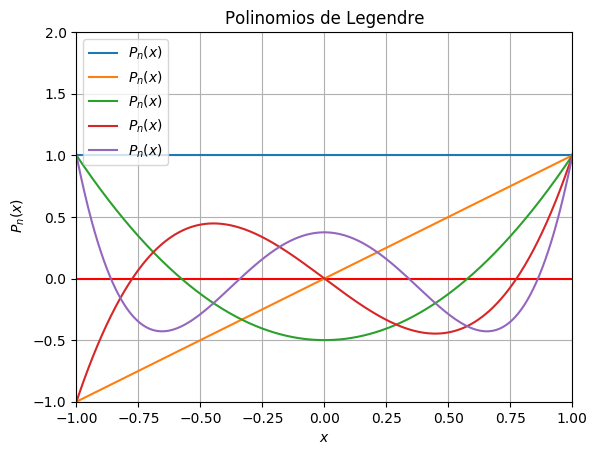

In [5]:
#Conjuntos de datos
x = linspace(-1.5, 1.5, 1000)
n=4
y=[]
for i=1:length(x)
    yy= p_legendre(n,x[i])
    y=push!(y,yy)        
end 

#Gráfica

fig,ax = subplots()
ax[:set_ylim](-1, 2.0)
ax[:set_xlim](-1, 1.0)
title("Polinomios de Legendre")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel(" \$P_n (x)\$")#Etiqueta para el eje Y
 
axhline(0, color="red") 
grid()

plot(x,y,label="\$P_{n}(x)\$") #label=r"$P_{}(x)$".format(n)
 
legend(loc="best")
show()

# Referencias


* http://www.frsn.utn.edu.ar/GIE/AN/IN/Polinomios_Legendre.pdf